# Parsing the dataset to be within the assessment terms.

In [6]:
import pandas as pd

# Run this code cell once.
(One time run only)

In [7]:
prod = pd.read_csv('/content/skincare_products_clean.csv')

# Parsing only 450 datapoints.
prod_sampled = prod.sample(n = 451, random_state = 42)

# Saving the parsed dataset to local.
prod_sampled.to_csv('Assessment_dataset_products.csv', index = False)

# Implementation of Recommendation System.

In [8]:
rec_sys = pd.read_csv('/content/Assessment_dataset_products.csv')
rec_sys.head(20)

,product_name,product_url,product_type,clean_ingreds,price
0,Sukin Blemish Control Clearing Facial Wash 125ml,https://www.lookfantastic.com/sukin-blemish-co...,Cleanser,"['aloe barbadenis extract', 'cocamidopropyl be...",£9.95
1,L'Oréal Paris Smooth Sugars Clearing Sugar Scr...,https://www.lookfantastic.com/l-oreal-paris-sm...,Exfoliator,"['glycerin', 'propylene glycol', 'sucrose', 'c...",£7.99
2,Trilogy Rosehip Oil Antioxidant+ 30ml,https://www.lookfantastic.com/trilogy-organic-...,Oil,"['rosa canina flower oil ', 'solanum lycopersi...",£31.50
3,DECLÉOR Luxury Size Lavender Shower Gel 400ml,https://www.lookfantastic.com/decleor-luxury-s...,Body Wash,"['sodium coco-sulfate', 'polyglyceryl-4 coco-c...",£17.50
4,Chantecaille Pure Rosewater 100ml,https://www.lookfantastic.com/chantecaille-pur...,Mist,"['rosa centifolia flower water', 'butylene gly...",£65.00
5,Clinique Smart SPF 15 Custom Repair Moisturise...,https://www.lookfantastic.com/clinique-smart-s...,Moisturiser,"['ethylhexyl salicylate', 'butyloctyl salicyla...",£52.00
6,FARMACY Honey Potion Renewing Antioxidant Hydr...,https://www.lookfantastic.com/farmacy-honey-po...,Mask,"['glycerin', 'diglycerin', 'polyglyceryl-10 st...",£36.00
7,Bulldog Oil Control Moisturiser 100ml,https://www.lookfantastic.com/bulldog-oil-cont...,Moisturiser,"['c12-15', 'tapioca starch', 'glycerin', 'sorb...",£4.50
8,Clinique for Men Face Wash 200ml,https://www.lookfantastic.com/clinique-for-men...,Cleanser,"['sodium laureth sulfate', 'sodium chloride', ...",£16.50
9,Mama Mio The Tummy Rub Oil 120ml,https://www.lookfantastic.com/mama-mio-the-tum...,Oil,"['prunus amygdalus dulcis', 'parfum', 'argania...",£27.00


# Data Preprocessing.

In [9]:
rec_sys.describe()

,product_name,product_url,product_type,clean_ingreds,price
count,451,451,451,451,451
unique,451,451,14,442,177
top,Sukin Blemish Control Clearing Facial Wash 125ml,https://www.lookfantastic.com/sukin-blemish-co...,Moisturiser,['sodium chloride'],£18.00
freq,1,1,53,3,14


In [10]:
rec_sys.isnull()

,product_name,product_url,product_type,clean_ingreds,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
446,False,False,False,False,False
447,False,False,False,False,False
448,False,False,False,False,False
449,False,False,False,False,False


In [11]:
def convert_price(price):
    # Remove currency symbols and convert to float
    try:
        return float(price.replace('\u00a3', '').replace('$', '').replace(',', '').strip())
    except:
        return np.nan

rec_sys['price'] = rec_sys['price'].astype(str).apply(convert_price)
rec_sys.dropna(subset = ['price'], inplace = True)  # Remove rows with invalid prices

# Visualising the Dataset.

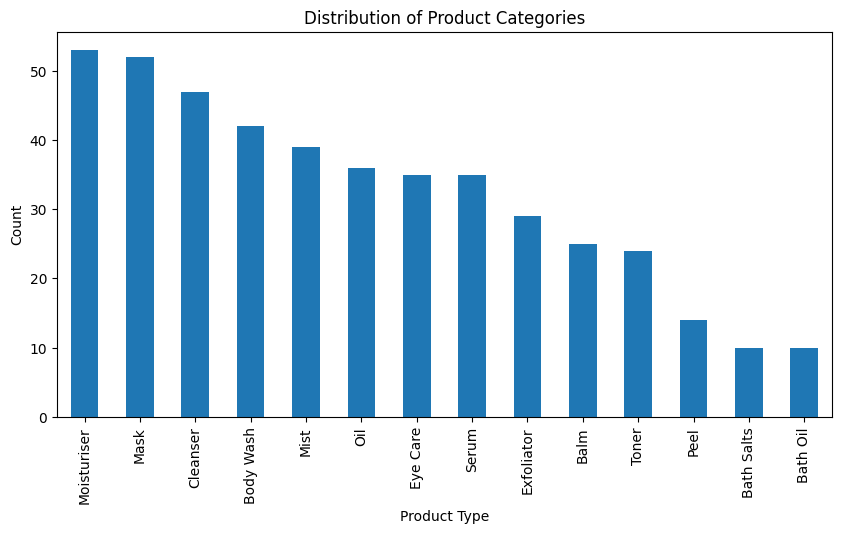

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
rec_sys['product_type'].value_counts().plot(kind = 'bar', title = 'Distribution of Product Categories')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

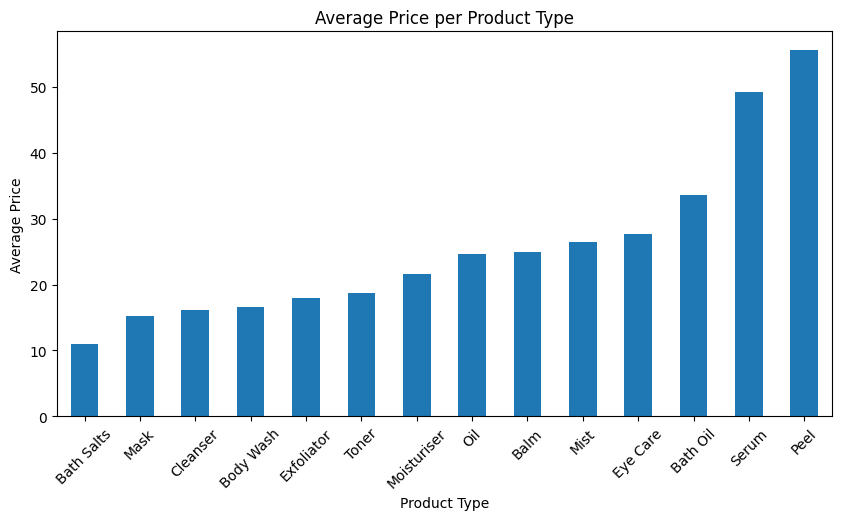

In [13]:
plt.figure(figsize = (10, 5))
avg_price_per_type = rec_sys.groupby('product_type')['price'].mean().sort_values()
avg_price_per_type.plot(kind = 'bar', title = 'Average Price per Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Feature Extraction.

In [14]:
# Fill missing values
rec_sys.fillna("", inplace = True)

# Combine product name and type with higher weight for importance
rec_sys['weighted_features'] = (
    rec_sys['product_name'].str.lower() * 2 + ' ' +  # Give more weight to name
    rec_sys['product_type'].str.lower() * 3 + ' ' +  # Give more weight to type
    rec_sys['clean_ingreds'].str.lower() + ' ' +
    'price ' + rec_sys['price'].astype(str)
)

# Building the Recommendation System model using TF-IDF & Cosine Similarity.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

In [16]:
# Feature Extraction using TF-IDF
tf_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tf_vectorizer.fit_transform(rec_sys['weighted_features'])

In [17]:
# Define the recommendation function
def get_recommendations(user_input, rec_sys, tfidf_matrix, top_n = 5):
    user_input = user_input.lower()
    user_tfidf = tf_vectorizer.transform([user_input])  # Convert user input to TF-IDF vector
    similarity_scores = cosine_similarity(user_tfidf, tfidf_matrix).flatten()  # Compute cosine similarity
    recommended_indices = similarity_scores.argsort()[::-1]  # Get sorted recommendations

    # Extract product type if mentioned in user input
    matched_type = None
    for product_type in rec_sys['product_type'].unique():
        if product_type.lower() in user_input:
            matched_type = product_type.lower()
            break

    # Filter by product type first if detected
    filtered_df = rec_sys.copy()
    if matched_type:
        filtered_df = filtered_df[filtered_df['product_type'].str.lower() == matched_type]

    # Apply price filtering if user specifies a price constraint
    price_match_below = re.search(r'under \$(\d+)', user_input)
    price_match_above = re.search(r'above \$(\d+)', user_input)
    price_match_range = re.search(r'between \$(\d+) and \$(\d+)', user_input)

    if price_match_below:
        price_limit = float(price_match_below.group(1))
        filtered_df = filtered_df[filtered_df['price'] <= price_limit]
    elif price_match_above:
        price_limit = float(price_match_above.group(1))
        filtered_df = filtered_df[filtered_df['price'] >= price_limit]
    elif price_match_range:
        low_price, high_price = float(price_match_range.group(1)), float(price_match_range.group(2))
        filtered_df = filte

    # Ensure index bounds are valid
    recommended_indices = [idx for idx in recommended_indices if idx < len(filtered_df)]
    recommendations = filtered_df.iloc[recommended_indices].head(top_n)[['product_name', 'product_type', 'clean_ingreds', 'price', 'product_url']].copy()
    recommendations['Similarity Score'] = similarity_scores[:len(recommendations)]

    print("\nTop Recommended Products:")
    for idx, row in recommendations.iterrows():
        print(f"Product Name: {row['product_name']}")
        print(f"Product Type: {row['product_type']}")
        print(f"Price: ${row['price']}")
        print(f"Ingredients: {row['clean_ingreds']}")
        print(f"Similarity Score: {row['Similarity Score']:.4f}")
        print(f"Product Link: {row['product_url']}")
        print("----------------------------------------")

    return recommendations

In [18]:
# Step 7: Example Usage
user_input = input("Enter a product name or description: ")
recommendations = get_recommendations(user_input, rec_sys, tfidf_matrix)

Enter a product name or description: I want a soap

Top Recommended Products:
Product Name: Shea Moisture African Black Soap Soothing Body Wash 384ml
Product Type: Body Wash
Price: $11.99
Ingredients: ['sodium lauroyl', 'cocamidopropyl', 'betaine', 'glycerin', 'parfum', 'simmondsia chinensis leaf extract', 'caramel', 'caprylyl glycol', 'guar hydroxypropultrimonium chloride', 'butyrospermum parkii', 'caprylhydroxamic acid', 'tocopherol', 'glycine soja extract', 'sodium palm kernelate', 'sodium', 'shea butterate', 'sodium cocoate', 'theobroma cacao extract', 'aloe barbadenis extract', 'ci 77499', 'avena sativa kernel extract', 'sodium chloride', 'coumarin']
Similarity Score: 0.0000
Product Link: https://www.lookfantastic.com/shea-moisture-african-black-soap-soothing-body-wash-384ml/11982741.html
----------------------------------------
Product Name: Cowshed RELAX Calming Bath & Shower Gel 300ml
Product Type: Body Wash
Price: $20.0
Ingredients: ['sodium cocoamphoacetate', 'cocamidopropyl 